In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# File to Load 
powerlifting_file_to_load = "resources/openpowerlifting.csv"

# Read Purchasing File and store into Pandas data frame
lifting_data = pd.read_csv(powerlifting_file_to_load)
lifting_data.head()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [2]:
#find total number of lifters
total_lifters=len(lifting_data['Name'].unique())
total_lifters

412574

In [2]:
#create new df with only female data
f_data=lifting_data.loc[lifting_data["Sex"] == "F", :]
f_data.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [3]:
#find all federations
federations=f_data['Federation'].unique()

In [44]:
#use loc to find specific info
pd.set_option('display.max_columns', None)
f_data.loc[f_data['Name'] == 'Emma Pang']

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
678094,Emma Pang,F,SBD,Raw,24.5,24-34,FR-O,53.3,57,90.0,-95.0,100.0,NaN,100.0,-42.5,45.0,47.5,NaN,47.5,90.0,-92.5,-92.5,NaN,90.0,237.5,5,290.46,290.46,257.25,436.49,Yes,NaN,USAPL,2018-06-02,USA,NY,NY State Championships
902519,Emma Pang,F,SBD,Raw,24.0,24-34,Open,50.4,52,NaN,NaN,NaN,NaN,87.5,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,NaN,92.5,225.0,2,287.30,287.30,255.01,422.63,NaN,NaN,USPA,2017-10-07,USA,NY,Long Island Columbus Day Classic


In [45]:
#equipment types
f_data['Equipment'].unique()

array(['Wraps', 'Raw', 'Multi-ply', 'Single-ply'], dtype=object)

In [47]:
#simplify by dropping all but raw equipment
female_raw_data = f_data[f_data.Equipment != 'Wraps']
female_raw_data = female_raw_data[female_raw_data.Equipment != 'Single-ply'] 
female_raw_data = female_raw_data[female_raw_data.Equipment != 'Multi-ply'] 

In [7]:
female_raw_data['Equipment'].unique()

array(['Raw'], dtype=object)

In [8]:
female_raw_data.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Glossbrenner', 'IPFPoints', 'Tested', 'Country',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'],
      dtype='object')

In [9]:
female_raw_data['Event'].unique()

array(['B', 'SBD', 'BD', 'D', 'S', 'SB', 'SD'], dtype=object)

In [10]:
female_raw_data.count()

Name               131835
Sex                131835
Event              131835
Equipment          131835
Age                104516
AgeClass           106978
Division           131672
BodyweightKg       131381
WeightClassKg      130986
Squat1Kg            56381
Squat2Kg            56097
Squat3Kg            55529
Squat4Kg              485
Best3SquatKg        92956
Bench1Kg            73565
Bench2Kg            73175
Bench3Kg            72310
Bench4Kg             1263
Best3BenchKg       120370
Deadlift1Kg         63520
Deadlift2Kg         62913
Deadlift3Kg         61988
Deadlift4Kg          1743
Best3DeadliftKg    107623
TotalKg            127997
Place              131835
Wilks              127575
McCulloch          127573
Glossbrenner       127575
IPFPoints          121480
Tested              96824
Country             34045
Federation         131835
Date               131835
MeetCountry        131835
MeetState           86645
MeetName           131835
dtype: int64

In [48]:
#drop unecessary columns
female_raw_data_cleaned=female_raw_data.drop(['Country', 'Squat4Kg','Bench4Kg','Deadlift4Kg'], axis=1)

In [49]:
#dropna from totalkg
f_data_cleaned=female_raw_data_cleaned.dropna(subset=['TotalKg'])
f_data_cleaned.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,NaN,NaN,NaN,27.5,32.5,-35.0,32.5,NaN,NaN,NaN,NaN,32.5,1,38.56,38.56,34.12,313.97,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
11,Christina Tsatsoulis,F,SBD,Raw,27.0,24-34,F-OR,102.0,110,135.0,-140.0,140.0,140.0,77.5,82.5,-85.0,82.5,180.0,-185.0,-185.0,180.0,402.5,2,333.24,333.24,285.55,571.03,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
14,Elizabeth Ciortuz,F,SBD,Raw,19.0,18-19,F-OR,72.7,75,95.0,105.0,112.5,112.5,55.0,-60.0,60.0,60.0,107.5,117.5,127.5,127.5,300.0,7,290.95,302.58,256.21,486.30,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
19,Jasmine Hoare,F,SBD,Raw,31.0,24-34,F-OR,77.7,82.5,130.0,137.5,145.0,145.0,75.0,80.0,-85.0,80.0,145.0,155.0,-165.0,155.0,380.0,4,353.56,353.56,310.54,599.76,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
21,Joelle Savgy,F,SBD,Raw,29.0,24-34,F-OR,72.1,75,90.0,100.0,105.0,105.0,55.0,60.0,-62.5,60.0,125.0,132.5,137.5,137.5,302.5,6,294.98,294.98,259.82,492.05,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [14]:
#tested
f_data_cleaned['Tested'].unique()

array([nan, 'Yes'], dtype=object)

In [50]:
#change untested from "nan" to "no"
f_data_cleaned['Tested'] = f_data_cleaned['Tested'].fillna('No')

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
f_data_cleaned['Tested'].count()

127997

In [17]:
#find number of tested vs untested
f_data_cleaned.groupby('Tested').count()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Federation,Date,MeetCountry,MeetState,MeetName
Tested,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,33764,33764,33764,33764,30911,31442,33653,33593,33147,3410,3388,3364,19387,9232,9189,9035,28450,7429,7349,7159,26627,33764,33764,33593,33593,33593,31484,33764,33764,33764,25165,33764
Yes,94233,94233,94233,94233,70359,72235,94186,93982,94036,51180,50940,50425,72037,62166,61902,61231,90198,54317,53927,53252,79035,94233,94233,93982,93980,93982,89996,94233,94233,94233,58910,94233


In [18]:
#data types
f_data_cleaned.dtypes

Name                object
Sex                 object
Event               object
Equipment           object
Age                float64
AgeClass            object
Division            object
BodyweightKg       float64
WeightClassKg       object
Squat1Kg           float64
Squat2Kg           float64
Squat3Kg           float64
Best3SquatKg       float64
Bench1Kg           float64
Bench2Kg           float64
Bench3Kg           float64
Best3BenchKg       float64
Deadlift1Kg        float64
Deadlift2Kg        float64
Deadlift3Kg        float64
Best3DeadliftKg    float64
TotalKg            float64
Place               object
Wilks              float64
McCulloch          float64
Glossbrenner       float64
IPFPoints          float64
Tested              object
Federation          object
Date                object
MeetCountry         object
MeetState           object
MeetName            object
dtype: object

In [52]:
#find issues with weightclasskg
f_data_cleaned['WeightClassKg'].unique()

array(['56', '110', '75', '82.5', '60', '67.5', '90+', '48', '52', '90',
       '110+', '44', '63', '57', '84+', '72', '47', '84', nan, '43', '40',
       '82.5+', '72+', '63+', '100', '100+', '35', '39', '60+', '50',
       '54.4', '58.9', '68.9', '78.9', '78.9+', '63.5', '36.2', '47.5',
       '55', '53', '58.5', '70', '70+', '30', '50.5', '55.5', '80', '75+',
       '58', '64', '61', '107', '34', '41', '45', '67', '73', '79', '86',
       '86+', '54', '77', '85', '85+', '+', '53+', '56+', '125', '72.5',
       '72.5+', '44.5', '45.8', '49.9', '53.9', '69.8', '76.6', '83',
       '90.2', '90.2+', '36', '63.9', '54.8', '82.1', '91.1+', '91.1',
       '102.5', '79.8', '47.6', '51.7', '55.7', '59.8', '65.7', '70.3',
       '74.8', '89.8', '99.7', '109.7', '99.7+', '57+', '74'],
      dtype=object)

In [53]:
#remove the + sign
f_data_cleaned['WeightClassKg'] = f_data_cleaned['WeightClassKg'].str.replace(r'+', '')
f_data_cleaned['WeightClassKg'].unique()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['56', '110', '75', '82.5', '60', '67.5', '90', '48', '52', '44',
       '63', '57', '84', '72', '47', nan, '43', '40', '100', '35', '39',
       '50', '54.4', '58.9', '68.9', '78.9', '63.5', '36.2', '47.5', '55',
       '53', '58.5', '70', '30', '50.5', '55.5', '80', '58', '64', '61',
       '107', '34', '41', '45', '67', '73', '79', '86', '54', '77', '85',
       '', '125', '72.5', '44.5', '45.8', '49.9', '53.9', '69.8', '76.6',
       '83', '90.2', '36', '63.9', '54.8', '82.1', '91.1', '102.5',
       '79.8', '47.6', '51.7', '55.7', '59.8', '65.7', '70.3', '74.8',
       '89.8', '99.7', '109.7', '74'], dtype=object)

In [54]:
#drop na from age and weightclasskg
f_data_cleaned=f_data_cleaned.dropna(subset=['WeightClassKg'])
f_data_cleaned=f_data_cleaned.dropna(subset=['Age'])

In [55]:
f_data_cleaned['WeightClassKg'].unique()

array(['56', '110', '75', '82.5', '60', '67.5', '90', '48', '52', '44',
       '63', '57', '84', '72', '47', '43', '40', '100', '35', '39',
       '47.5', '30', '50.5', '58', '64', '53', '50', '61', '107', '36.2',
       '34', '58.5', '70', '80', '55.5', '41', '45', '55', '67', '73',
       '79', '86', '', '125', '72.5', '49.9', '53.9', '76.6', '90.2',
       '83', '36', '54.8', '82.1', '63.9', '91.1', '102.5', '47.6',
       '51.7', '55.7', '59.8', '65.7', '70.3', '74.8', '89.8', '99.7',
       '109.7', '74'], dtype=object)

In [56]:
weight_array=f_data_cleaned[["WeightClassKg"]].to_numpy()
weight_array

array([['56'],
       ['110'],
       ['75'],
       ...,
       ['84'],
       ['84'],
       ['84']], dtype=object)

In [57]:
weight_array.astype(int)

ValueError: invalid literal for int() with base 10: '82.5'

In [58]:
#find weird outlier age
f_data_cleaned['Age'].min()

0.5

In [59]:
#sort by age
f_data_cleaned.sort_values('Age', inplace=True)
f_data_cleaned.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName
552517,Emma Brown,F,B,Raw,0.5,NaN,Open,82.50,82.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.5,NaN,NaN,NaN,NaN,132.5,1,119.25,NaN,104.38,919.47,Yes,ParaPL,2000-10-26,Australia,NSW,Powerlifting at the Sydney Paralympic Games
29696,Svetlana Kovaleva,F,B,Raw,3.5,NaN,Disabled,71.60,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.5,NaN,NaN,NaN,NaN,52.5,1,51.43,NaN,45.31,427.83,Yes,UkrainePF,2001-03-13,Ukraine,NaN,Ukrainian Paralympic Championship
657748,Sofia Corridean,F,D,Raw,5.0,5-12,Youth,20.87,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,32.5,42.5,42.5,42.5,1,71.29,123.33,71.16,NaN,Yes,RAW,2018-05-19,USA,NaN,American Challenge
656888,Sofia Corridean,F,SBD,Raw,5.0,5-12,Youth,23.30,44,NaN,NaN,NaN,15.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,25.0,50.0,2,83.87,145.10,83.72,NaN,Yes,RAW,2018-02-03,USA,NC,NC State Championships
656286,Sofia Corridean,F,D,Raw,5.0,5-12,Youth,24.10,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.5,22.5,28.5,28.5,28.5,1,47.81,82.71,47.72,NaN,Yes,RAW,2018-03-24,USA,NC,Battle of the Border


In [60]:
#drop outlier and "youth" division
f_adult_data_cleaned = f_data_cleaned[f_data_cleaned.Division != 'Youth']
f_adult_data_cleaned = f_data_cleaned[f_data_cleaned.Name != 'Emma Brown']
f_adult_data_cleaned.head(20)

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName
29696,Svetlana Kovaleva,F,B,Raw,3.5,NaN,Disabled,71.60,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.50,NaN,NaN,NaN,NaN,52.50,1,51.43,NaN,45.31,427.83,Yes,UkrainePF,2001-03-13,Ukraine,NaN,Ukrainian Paralympic Championship
657748,Sofia Corridean,F,D,Raw,5.0,5-12,Youth,20.87,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,32.5,42.5,42.50,42.50,1,71.29,123.33,71.16,NaN,Yes,RAW,2018-05-19,USA,NaN,American Challenge
656888,Sofia Corridean,F,SBD,Raw,5.0,5-12,Youth,23.30,44,NaN,NaN,NaN,15.00,NaN,NaN,NaN,10.00,NaN,NaN,NaN,25.00,50.00,2,83.87,145.10,83.72,NaN,Yes,RAW,2018-02-03,USA,NC,NC State Championships
656286,Sofia Corridean,F,D,Raw,5.0,5-12,Youth,24.10,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.5,22.5,28.5,28.50,28.50,1,47.81,82.71,47.72,NaN,Yes,RAW,2018-03-24,USA,NC,Battle of the Border
655941,Sonya Stengel,F,D,Raw,5.0,5-12,Youth,43.09,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00,25.00,1,35.69,61.74,32.09,90.87,Yes,RAW,2018-04-08,USA,OH,Tri State Championships
1356661,Laila Thomas,F,D,Raw,5.5,5-12,FOR-AD,23.86,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.29,36.29,G,60.87,101.66,60.76,NaN,Yes,UPA,2015-11-07,USA,MI,Relentless Detroit
653903,Sofia Corridean,F,BD,Raw,5.5,5-12,Youth,26.00,44,NaN,NaN,NaN,NaN,8.0,11.0,13.5,13.50,32.5,40.0,45.5,45.50,59.00,1,98.97,165.28,98.79,NaN,Yes,RAW,2018-10-11,USA,VA,World Championships
653899,Sofia Corridean,F,SBD,Raw,5.5,5-12,Youth,26.00,44,20.0,25.0,30.0,30.00,8.0,11.0,13.5,13.50,32.5,40.0,45.5,45.50,89.00,1,149.29,249.31,149.02,NaN,Yes,RAW,2018-10-11,USA,VA,World Championships
880823,Berlynn Shamblin,F,D,Raw,6.0,5-12,Juniors,29.70,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.50,27.50,G,45.75,76.41,45.49,NaN,No,USPA,2017-08-12,USA,OR,Summer Slam Powerlifting Meet
821844,Berlynn Shamblin,F,SBD,Raw,6.0,5-12,Juniors,31.60,44,NaN,NaN,NaN,25.87,NaN,NaN,NaN,20.87,NaN,NaN,NaN,42.50,89.24,G,146.70,244.99,142.18,NaN,No,USPA,2018-03-10,USA,OR,Southern Oregon Iron Classic


Text(0.5, 1.0, 'Raw Female Powerlifters Age and Wilks')

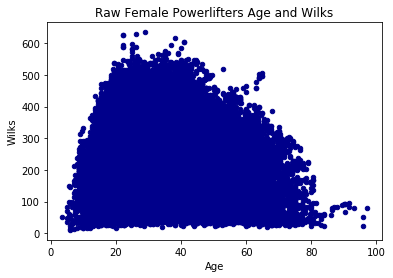

In [61]:
#create scatter plot to show age vs wilks
ax1 = f_adult_data_cleaned.plot.scatter(x='Age',
                      y='Wilks',
                      c='DarkBlue')
plt.title("Raw Female Powerlifters Age and Wilks")

In [64]:
f_adult_data_cleaned["MeetCountry"].unique()

array(['Ukraine', 'USA', 'Australia', 'India', 'Hungary', 'Latvia',
       'Russia', 'Canada', 'Kazakhstan', 'Czechia', 'South Africa',
       'Portugal', 'Finland', 'Ireland', 'Poland', 'UK', 'Argentina',
       'Serbia', 'New Zealand', 'France', 'Japan', 'Uzbekistan',
       'Denmark', 'Iceland', 'UAE', 'Belarus', 'Estonia', 'Peru',
       'Germany', 'Singapore', 'Taiwan', 'Georgia', 'US Virgin Islands',
       'Norway', 'England', 'Chile', 'Scotland', 'Belgium', 'Sweden',
       'Slovakia', 'Spain', 'N.Ireland', 'Ecuador', 'Lithuania', 'Nauru',
       'Slovenia', 'Bosnia and Herzegovina', 'Brazil', 'Croatia',
       'Algeria', 'Papua New Guinea', 'New Caledonia', 'Puerto Rico',
       'Philippines', 'Mexico', 'Uruguay', 'Italy', 'Austria', 'Malaysia',
       'South Korea', 'Wales', 'Switzerland', 'Netherlands', 'China',
       'Greece', 'Thailand', 'Turkey', 'Costa Rica', 'Morocco',
       'Colombia', 'Luxembourg', 'Azerbaijan', 'Israel'], dtype=object)

In [69]:
# f_adult_data_cleaned.plt.bar(x="MeetCountry", y="Wilks", rot=70, title="Country and Wilks");

# plot.show(block=True);